# 파이썬 (0516) 11주차

김보람  
2022-05-16

In [1]:
from PIL import Image
import requests

## 클래스 공부 2단계

### *init*()

`-` STOOOP를 다시 복습

In [14]:
url1 = 'https://github.com/guebin/IP2022/blob/master/_notebooks/2022-05-07-stop1.jpeg?raw=true'
url2 = 'https://github.com/guebin/IP2022/blob/master/_notebooks/2022-05-07-stop2.png?raw=true'

In [15]:
class STOOOP: 
    title = '학교폭력!' 
    url = url1
    end = '멈춰~~~~'
    def stop(self):
        print(self.title)
        display(Image.open(Image.io.BytesIO(requests.get(self.url).content)))
        print(self.end) 

In [16]:
s1=STOOOP() # STOOOP라는 클래스에서 s1이라는 인스턴스를 만드는 과정

In [17]:
s1.title, s1.url, s1.end

학교폭력!
멈춰~~~~

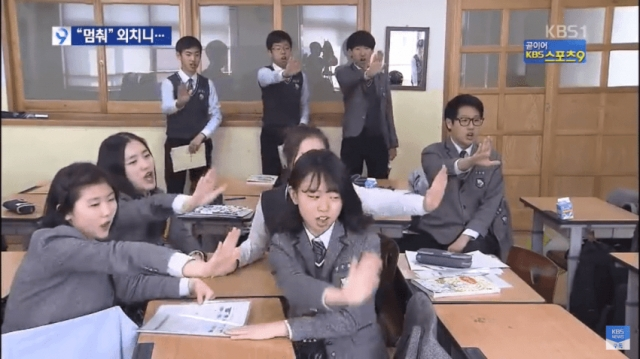

In [18]:
s1.stop()

`-` 왜 s1의 default title이 항상 “학교폭력”이어야 하는가? =\>
`__init__`의 개발

`-` 성능4: `__init__()` 함수를 이용하여 “클래스-\>인스턴스”의 시점에서
수행하는 일련의 동작들을 묶어서 수행할 수 있음

In [28]:
class STOOOP: 
    #title = '학교폭력!' 
    url = url1
    end = '멈춰~~~~'
    def __init__(self,title):
        self.title = title
    def stop(self):
        print(self.title)
        display(Image.open(Image.io.BytesIO(requests.get(self.url).content)))
        print(self.end) 

`-` 잘못된사용

In [33]:
s1=STOOOP()  # 이 시점에서 _init_ 이 수행된다!

`-` 올바른사용

In [34]:
s1=STOOOP("수강신청")  # 이 시점에서 _init_ 이 수행된다!

In [35]:
s1.title, s1.url, s1.end

수강신청
멈춰~~~~

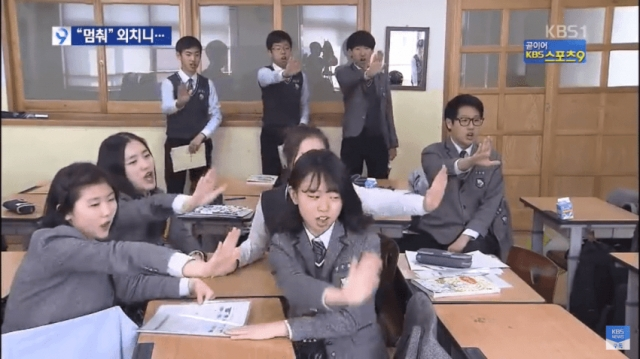

In [36]:
s1.stop()

`-` 잘못된 사용에서 에러가 발생한 이유?

    TypeError: __init__() missing 1 required positional argument: 'title'

-   s1 = STOOOP() 가 실행되는 순간 `__init__()` 이 내부적으로 실행된다.
-   그런데 `__init__()`의 첫번째 입력은 `self` 는 입력안해도 무방했음.
    (현재는 메소드와 함수를 구분하는 문법으로 self를 이해하면 된다.)
    그런데 두번째 입력은 title은 입력을 해야했음.
-   그런데 title을 입력하지 않아서 발생하는 에러

`-` `__init__(self, arg1, arg2, ...)` 함수에 대하여 - 엄청나게 특별해
보이지만 사실 몇가지 특별한 점을 제외하고는 어떠한 마법도 없는
함수이다. - 특별한점1: 첫번째 입력으로 반드시 self를 넣어야함. (이거
ㄴ사실 클래스 내의 메소드 거의 다 그러하다.) - 특별한점2: 클래스에서
인스턴스를 만드는 시점에 자동으로 생성됨 - 특별한점3:
`__init__(self, arg1, arg2, ...)` 의 입력중 self 이외의 입력들은
“클래스-\>인스턴스”의 시점에서 “인스턴스이름 =
클래스이름(arg1,arg2,…)”와 같이 사용한다. (이 예제의 경우
STOOOP(title)와 같이 사용해야함)

`-` title 이 디폴트로 들어가는 상황도 불편했지만, title을 명시적으로
넣지 않으면 에러가 발생하는 것도 불편하다?

In [37]:
class STOOOP: 
    #title = '학교폭력!' 
    url = url1
    end = '멈춰~~~~'
    def __init__(self,title=None):
        self.title = title
    def stop(self):
        print(self.title)
        display(Image.open(Image.io.BytesIO(requests.get(self.url).content)))
        print(self.end) 

In [39]:
s2=STOOOP()
s3=STOOOP('KOSPI하락')

None
멈춰~~~~

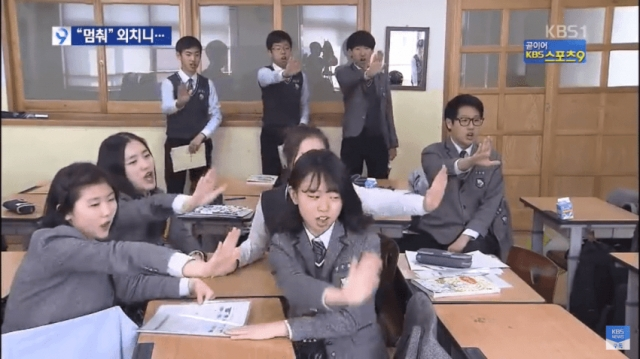

In [40]:
s2.stop()

-   제목이 없으면 없는데로

KOSPI하락
멈춰~~~~

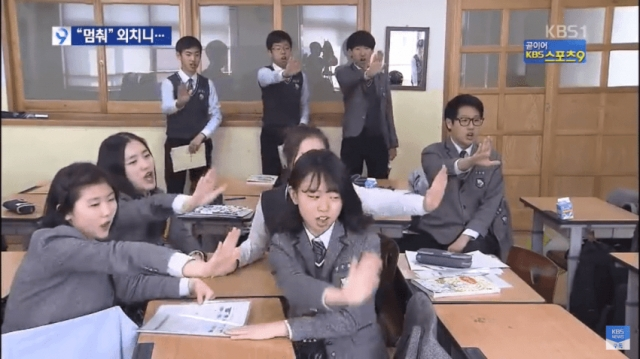

In [41]:
s3.stop()

### self의 의미

`-` 이전 예제를 다시 복습

In [42]:
class Klass4:
    n = 1
    url = 'https://github.com/guebin/IP2022/blob/master/_notebooks/2022-05-07-stop1.jpeg?raw=true'
    def show(self):
        display(Image.open(Image.io.BytesIO(requests.get(self.url).content)))
        print("당신은 이 이미지를 {}번 보았습니다".format(self.n))
        self.n = self.n+1 

In [43]:
k4=Klass4()

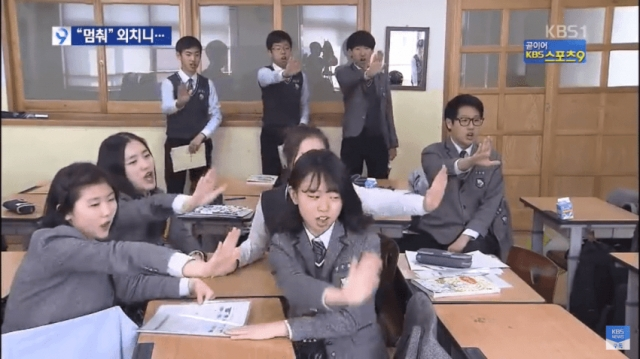

당신은 이 이미지를 5번 보았습니다

In [48]:
k4.show()

`-` 위의 예제는 아래와 같이 구현할 수도 있다.

In [49]:
class Klass4:
    n = 1
    url = 'https://github.com/guebin/IP2022/blob/master/_notebooks/2022-05-07-stop1.jpeg?raw=true'
    def show(self):
        display(Image.open(Image.io.BytesIO(requests.get(self.url).content)))
        print("당신은 이 이미지를 {}번 보았습니다".format(self.n))
       # self.n = self.n+1 

In [50]:
k4=Klass4()

In [51]:
k4.n

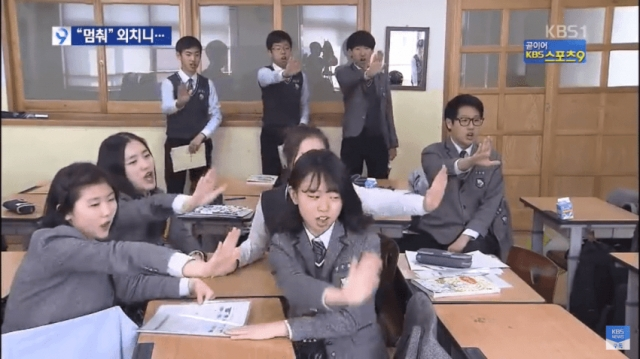

당신은 이 이미지를 1번 보았습니다

In [52]:
k4.show()

In [53]:
k4.n = k4.n +1

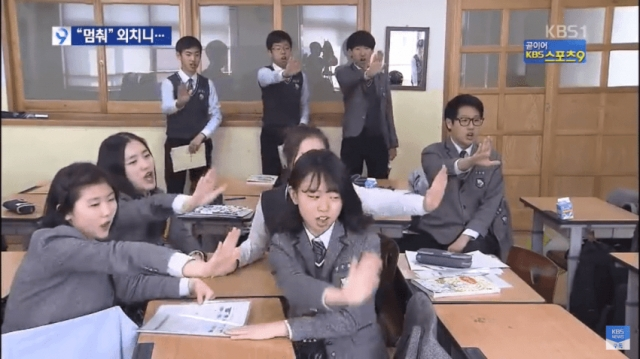

당신은 이 이미지를 2번 보았습니다

In [54]:
k4.show()

In [56]:
k4.n = k4.n + 1

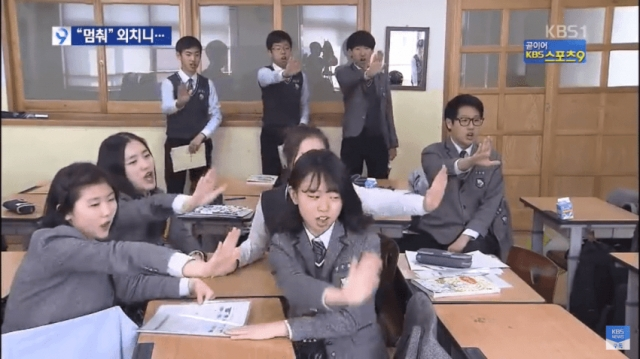

당신은 이 이미지를 3번 보았습니다

In [57]:
k4.show()

`-` 결국에는 `k4.n = k4.n +1` 의 기능을 구현하여 넣은 것이
`self.n = slef.n + 1` 이다.

`-` 따라서 self는 k4에 대응한다. 즉 self는 인스턴스의 이름에 대응한다.
우리가 하고 싶은 것은 클래스를 선언하는 시점에 인스턴스가 생성된 이후의
시점에 대한 어떠한 동작들을 정의하고 싶음. 그런데 클래스를 설계하는
시점에서는 인스턴스의 이름이 정해지지 않았으므로 (아직 인스턴스가
태어나지도 않음) 이러한 동작들을 정의하기 불편하다. 그래서 클래스를
설계하는 시점에서 그 클래스로부터 만들어지는 인스턴스는 그냥 self라는
가칭으로 부른다. (굳이 비유하면 self는 인스턴스의 태명같은것..)

In [58]:
# 여기서 말하는 인스턴스는 정확하게 무엇인가? 그냥.. self, k4 와 같이 이름을 말하는건가?

`-` self의 의미는 (이후에 만들어질) 인스턴스의 이름이다. (즉 self는
인스턴스의 태명같은 것임)

### 파이썬의 비밀1

***탐구*** : 인스턴스의 자료형이 뭔지 탐구하자!

`-` 아래의 두 클래스를 비교해보자

In [59]:
class STOOOP: 
    #title = '학교폭력!' 
    url = url1
    end = '멈춰~~~~'
    def __init__(self,title=None): 
        self.title = title
    def stop(self):
        print(self.title)
        display(Image.open(Image.io.BytesIO(requests.get(self.url).content)))
        print(self.end) 

In [60]:
class Klass4:
    n = 1
    url = 'https://github.com/guebin/IP2022/blob/master/_notebooks/2022-05-07-stop1.jpeg?raw=true'
    def show(self):
        display(Image.open(Image.io.BytesIO(requests.get(self.url).content)))
        print("당신은 이 이미지를 {}번 보았습니다".format(self.n))
        #self.n = self.n+1     

`-` 인스턴스를 생성해보자.

In [61]:
k4=Klass4()
s1=STOOOP()

`-` 타입을 알아보자.

In [62]:
k4?

In [63]:
s1?

`-`??? 타입은 자료형, 즉 int, float, list 이런 것 아니었나?

In [64]:
a=[1,2,3]
a?

In [65]:
a=3.14
a?

`-` 그런데 지금 k4, s1의 타입은 Klass4, STOOOP이다.

-   가설1: 사실 파이썬 내부에 Klass4, STOOOP 이라는 자료형이 있었다.
    그런데 내가 만든 k4, s1이 우연히 그 자료형을 따르는 것 (억지스러움)

In [66]:
class SoWhatTV:
    title='어쩔티비'

In [67]:
a=SoWhatTV()
a?

In [68]:
# 잉.. 우연히 자료형이 sowhattv가 잇을거 같진 않은데. .가설1이 맞진 않는거 같다

-   가설2: type이 list인것은 사실 list라는 클래스에서 생긴 인스턴스이다.
    -\> 리스트자료형을 찍어낼 수 있는 어떠한 클래스가 내부적으로 존재할
    것이다.

***깨달음1***

`-` 가설2가 맞다면 아래는 모두 어딘가에서 찍혀진 인스턴스이다.

In [70]:
a=[1,2,3]
a?

In [71]:
a='1'
a?

`-` 그리고 위의 `a=[1,2,3]`과 같은 것들은 모두 “클래스-\>인스턴스”에
해당하는 과정이었음

***깨달음2***

`-` 생각해보니까 아래와 같이 list를 선언하는 방식도 있었음

In [72]:
a=list()
a

-   list라는 이름의 클래스에서 a라는 인스턴스를 찍어내는 문법이다.

`-` 아래도 가능

In [75]:
a=list((1,2,3))
a?

`-` list라는 이름의 클래스에서 a라는 인스턴스를 찍어내는 문법. 여기에서
(1,2,3)은 `__init__()`의 입력이다.

***깨달음3***

`-` 각 자료형마다 특수한 기능들이 있다.

In [76]:
a=[1,2,3]
a

`-` `a.` + tab 을 하면 append, clear 등등이 나온다.

`-` 이러한 기능은 지금까지 우리가 “list자료형 특수기능들” 이라고
부르면서 사용했다. 그런데 a가 list클래스에서 생성된 인스턴스라는
관점에서 보면 이러한 기능들은 list클래스에서 정의된 메소드라고 볼 수
있다.

***깨달음4***

`-` `a.f()`는 `f(a)`로 해석가능하다고 했다. 이 해석에 따르면 메소드의
첫번째 입력은 메소드가 소속된 인스턴스라고 해석할 수 있다.

`-` 동일한 논리로 아래의 코드는 stop()의 입력에서 s1을 넣는다는
의미이다.

None
멈춰~~~~

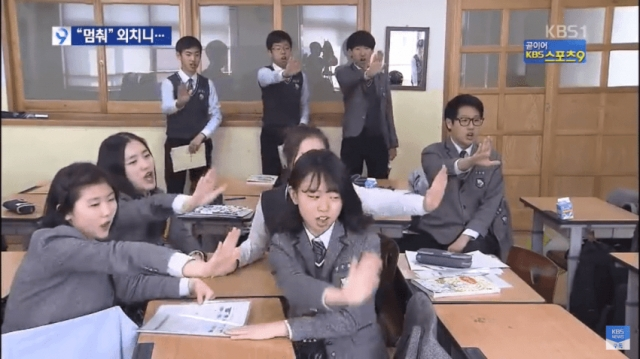

In [78]:
s1.stop()   #s1자체가 입력이 되는것

## 숙제

아래의 조건에 맞는 클래스를 생성하라.

1.  \[‘가위’,‘바위’\]와 같은 리스트를 입력으로 받아 인스턴스를 생성한다.

2.  위의 리스트에서 하나의 값을 뽑는 메소드 f를 가지고 있다.

In [94]:
# # 너무 헷 갈ㄹ  ㅕ .. 

# # 사용예시


# a = Klass(['가위','바위'])
# a.f() # 가위가 1/2 바위가 1/2의 확률로 출력 
# b = Klass(['가위','바위','보'])
# b.f() # 가위, 바위, 보가 1/3의 확률로 출력